In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report as cr
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

lr = LogisticRegression(solver='newton-cg', multi_class='ovr', n_jobs=1) 
lda = LinearDiscriminantAnalysis(solver='svd')
qda = QuadraticDiscriminantAnalysis()

%matplotlib inline

In [6]:
df = pd.read_csv('data/ethylene_methane.txt', delim_whitespace=True, skiprows=1, header=None, names=['Time','Methane','Ethylene','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])

In [7]:
Methane_bin = []
Ethylene_bin = []

for i in df['Methane']:
    if i > 0.0: 
        Methane_bin.append(int(1))
    else:
        Methane_bin.append(int(0))
for i in df['Ethylene']:
    if i > 0.0: 
        Ethylene_bin.append(int(1))
    else:
        Ethylene_bin.append(int(0))

df['Methane Bin'] = Methane_bin
df['Ethylene Bin'] = Ethylene_bin


# **50/50 Split**


In [8]:
x1 = df[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']]
y1_meth = df['Methane Bin']
y2_ethy = df['Ethylene Bin']


x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x1, y1_meth, test_size=0.50, random_state=42)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x1, y2_ethy, test_size=0.50, random_state=42)

# **LDA 50/50**

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='svd')

ytest_pred_lda = lda.fit(x_train_1.values, y_train_1.values).predict(x_test_1.values)
ytest_pred_lda2 = lda.fit(x_train_2.values, y_train_2.values).predict(x_test_2.values)


### Methane LDA model Stats

In [10]:
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report, precision_score

scor1 = sm.accuracy_score(y_test_1, ytest_pred_lda)
print("Methane Accuracy = {}".format(scor1))

print("\n")
print("Methane LDA model Classification Report")
print(classification_report(y_test_1, ytest_pred_lda, target_names=['Methane', 'No Methane']))

print("\n")
print("LDA Methane Confusion Matrix")
df3=pd.DataFrame({'True': y_test_1,
                    'Predicted': ytest_pred_lda})
df3.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df3.groupby(['Predicted','True']).size().unstack('True')

Methane Accuracy = 0.9330525948999929


Methane LDA model Classification Report
              precision    recall  f1-score   support

     Methane       0.95      0.93      0.94   1165323
  No Methane       0.91      0.94      0.93    923929

    accuracy                           0.93   2089252
   macro avg       0.93      0.93      0.93   2089252
weighted avg       0.93      0.93      0.93   2089252



LDA Methane Confusion Matrix


True,No,Yes
Predicted,,
No,1084780,59327
Yes,80543,864602


<br>

###  Ethylene Model Stats

In [11]:
scor2 = sm.accuracy_score(y_test_2, ytest_pred_lda2)
print("Ethylene Accuracy = {}".format(scor2))

print("\n")
print("Ethylene LDA model Classification Report")
print(classification_report(y_test_2, ytest_pred_lda2, target_names=['Ethylene', 'No Ethylene']))

print("\n")
print("LDA Ethylene Confusion Matrix")
df4=pd.DataFrame({'True': y_test_2,
                    'Predicted': ytest_pred_lda2})
df4.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df4.groupby(['Predicted','True']).size().unstack('True')



Ethylene Accuracy = 0.9049099869235496


Ethylene LDA model Classification Report
              precision    recall  f1-score   support

    Ethylene       0.90      0.94      0.92   1188213
 No Ethylene       0.91      0.86      0.89    901039

    accuracy                           0.90   2089252
   macro avg       0.91      0.90      0.90   2089252
weighted avg       0.91      0.90      0.90   2089252



LDA Ethylene Confusion Matrix


True,No,Yes
Predicted,,
No,1114662,125116
Yes,73551,775923


# **QDA 50/50**

In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

y_pred_qda1 = qda.fit(x_train_1.values, y_train_1.values).predict(x_test_1.values)
y_pred_qda2 = qda.fit(x_train_2.values, y_train_2.values).predict(x_test_2.values)

<br>

### Methane QDA Model Stats

In [13]:
qda_scor1 = sm.accuracy_score(y_test_1, y_pred_qda1)
print("Methane QDA model Accuracy = {}".format(qda_scor1))

print("\n")
print("Methane QDA model Classification Report")
print(classification_report(y_test_1, y_pred_qda1, target_names=['Methane', 'No Methane']))

print("\n")
print("QDA Methane Confusion Matrix")
df3=pd.DataFrame({'True': y_test_1,
                    'Predicted': y_pred_qda1})
df3.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df3.groupby(['Predicted','True']).size().unstack('True')

Methane QDA model Accuracy = 0.9222793612259316


Methane QDA model Classification Report
              precision    recall  f1-score   support

     Methane       0.95      0.91      0.93   1165323
  No Methane       0.89      0.94      0.91    923929

    accuracy                           0.92   2089252
   macro avg       0.92      0.92      0.92   2089252
weighted avg       0.92      0.92      0.92   2089252



QDA Methane Confusion Matrix


True,No,Yes
Predicted,,
No,1062477,59532
Yes,102846,864397


<br>

### Ethylene QDA Model Stats

In [14]:
qda_scor2 = sm.accuracy_score(y_test_2, y_pred_qda2)
print("Ethylene QDA model Accuracy = {}".format(qda_scor2))

print("\n")
print("Ethylene QDA model Classification Report")
print(classification_report(y_test_2, y_pred_qda2, target_names=['Ethylene', 'No Ethylene']))

print("\n")
print("QDA Ethylene Confusion Matrix")
df4=pd.DataFrame({'True': y_test_2,
                    'Predicted': y_pred_qda2})
df4.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df4.groupby(['Predicted','True']).size().unstack('True')

Ethylene QDA model Accuracy = 0.8740788569306144


Ethylene QDA model Classification Report
              precision    recall  f1-score   support

    Ethylene       0.90      0.88      0.89   1188213
 No Ethylene       0.84      0.87      0.86    901039

    accuracy                           0.87   2089252
   macro avg       0.87      0.87      0.87   2089252
weighted avg       0.88      0.87      0.87   2089252



QDA Ethylene Confusion Matrix


True,No,Yes
Predicted,,
No,1039990,114858
Yes,148223,786181


<br>
<br>
<br>
<br>


# Logistic Regression 50/50

In [15]:
import sklearn.linear_model as sk_lm
lr = sk_lm.LogisticRegression(solver='newton-cg', multi_class='ovr', n_jobs=1) 

#Methane Fit
y_pred_lr1 = lr.fit(x_train_1.values, y_train_1.values).predict(x_test_1.values)  
#Ethylene Fit
y_pred_lr2 = lr.fit(x_train_2.values, y_train_2.values).predict(x_test_2.values) 

<br>

### Methane Logistic Regression Model Stats

In [16]:
lr_scor1 = sm.accuracy_score(y_test_1, y_pred_lr1)
print("Methane Logistic Regression model Accuracy = {}".format(lr_scor1))

print("\n")
print("Methane Logistic Regression model Classification Report")
print(classification_report(y_test_1, y_pred_lr1, target_names=['Methane', 'No Methane']))

print("\n")
print("Logistic Regression Methane Confusion Matrix")
df3=pd.DataFrame({'True': y_test_1,
                    'Predicted': y_pred_lr1})
df3.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df3.groupby(['Predicted','True']).size().unstack('True')

Methane Logistic Regression model Accuracy = 0.9403140454095533


Methane Logistic Regression model Classification Report
              precision    recall  f1-score   support

     Methane       0.95      0.94      0.95   1165323
  No Methane       0.93      0.94      0.93    923929

    accuracy                           0.94   2089252
   macro avg       0.94      0.94      0.94   2089252
weighted avg       0.94      0.94      0.94   2089252



Logistic Regression Methane Confusion Matrix


True,No,Yes
Predicted,,
No,1099994,59370
Yes,65329,864559


<br>

### Ethylene Logistic Regression Model Stats

In [17]:
lr_scor2 = sm.accuracy_score(y_test_2, y_pred_lr2)
print("Ethylene Logistic Regression model Accuracy = {}".format(lr_scor2))

print("\n")
print("Ethylene Logistic Regression model Classification Report")
print(classification_report(y_test_2, y_pred_lr2, target_names=['Ethylene', 'No Ethylene']))

print("\n")
print("Logistic Regression Ethylene Confusion Matrix")
df4=pd.DataFrame({'True': y_test_2,
                    'Predicted': y_pred_lr2})
df4.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df4.groupby(['Predicted','True']).size().unstack('True')

Ethylene Logistic Regression model Accuracy = 0.9130837256587525


Ethylene Logistic Regression model Classification Report
              precision    recall  f1-score   support

    Ethylene       0.91      0.94      0.93   1188213
 No Ethylene       0.92      0.87      0.90    901039

    accuracy                           0.91   2089252
   macro avg       0.91      0.91      0.91   2089252
weighted avg       0.91      0.91      0.91   2089252



Logistic Regression Ethylene Confusion Matrix


True,No,Yes
Predicted,,
No,1121377,114754
Yes,66836,786285


<br>
<br>
<br>
<br>

# Preprocessing
We see that sensor2 is not functioning properly so we will eliminate it. We will also eliminate the first chunk of time where the sensor is actualizing as seen in the plot above. We will eliminate the first 200 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Conductivity vs Time')

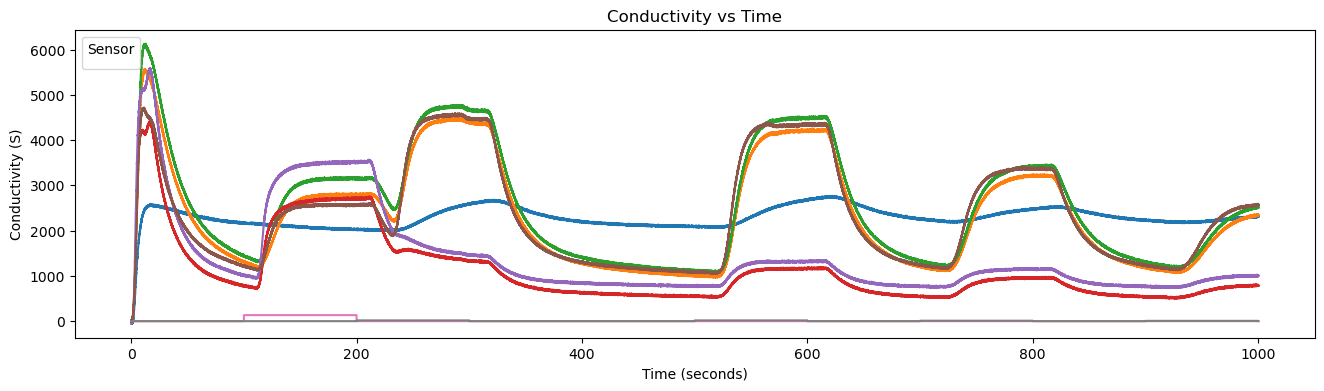

In [18]:
df2 = df.drop(columns='2')
df3 = df2[20000:]
plt.figure(figsize=(16,4))
a = np.arange(100000)
plt.plot(df2['Time'][a], df['1'][a])
plt.plot(df2['Time'][a], df['3'][a])
plt.plot(df2['Time'][a], df['4'][a])
plt.plot(df2['Time'][a], df['5'][a])
plt.plot(df2['Time'][a], df['6'][a])
plt.plot(df2['Time'][a], df['7'][a])
plt.plot(df2['Time'][a], df['Methane'][a])
plt.plot(df2['Time'][a], df['Ethylene'][a])

plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')

plt.legend(loc='upper left', title ="Sensor")
plt.title('Conductivity vs Time')

In [19]:
from sklearn.preprocessing import StandardScaler

x2 = StandardScaler().fit(df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values)
x2 = x2.transform(df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values)
ym2 = df3['Methane Bin'].values.reshape(-1,1)
ye2 = df3['Ethylene Bin'].values.reshape(-1,1)
y2 = np.concatenate((ym2, ye2), axis=1)
x2_train, x2_test, ym2_train, ym2_test, ye2_train, ye2_test= train_test_split(x2, ym2, ye2, test_size=0.50, random_state=42)

ymtest_pred_lda = lda.fit(x2_train, ym2_train).predict(x2_test)
yetest_pred_lda = lda.fit(x2_train, ye2_train).predict(x2_test)

print("Methane LDA Accuracy = {}".format(sm.accuracy_score(ym2_test, ymtest_pred_lda)))
print("Ethylene LDA Accuracy = {}".format(sm.accuracy_score(ye2_test, yetest_pred_lda)))

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

ymtest_pred_qda = qda.fit(x2_train, ym2_train).predict(x2_test)
yetest_pred_qda = qda.fit(x2_train, ye2_train).predict(x2_test)

print("Methane QDA Accuracy = {}".format(sm.accuracy_score(ym2_test, ymtest_pred_qda)))
print("Ethylene QDA Accuracy = {}".format(sm.accuracy_score(ye2_test, yetest_pred_qda)))

import sklearn.linear_model as sk_lm
lr = sk_lm.LogisticRegression(solver='newton-cg', multi_class='ovr', n_jobs=1) 


ymtest_pred_lr = lr.fit(x2_train, ym2_train).predict(x2_test)
yetest_pred_lr = lr.fit(x2_train, ye2_train).predict(x2_test)

print("Methane Logistic Regression Accuracy = {}".format(sm.accuracy_score(ym2_test, ymtest_pred_lr)))
print("Ethylene Logistic Regression Accuracy = {}".format(sm.accuracy_score(ye2_test, yetest_pred_lr)))


Methane LDA Accuracy = 0.9390203784822619
Ethylene LDA Accuracy = 0.9044925771383171
Methane QDA Accuracy = 0.9295770786802177
Ethylene QDA Accuracy = 0.8857002422024843
Methane Logistic Regression Accuracy = 0.9436619515094852
Ethylene Logistic Regression Accuracy = 0.9124920885010571


: 